* 1. 随机梯度更新
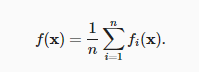
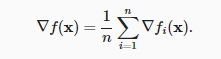
每次迭代的计算代价从梯度下降的 O(n) 降至常数 O(1) 。
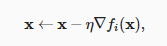
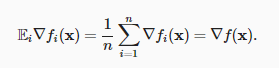
* 2. 动态学习率
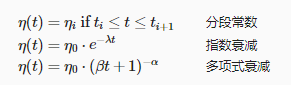
* 3. 梯度下降和随机梯度下降的区别：
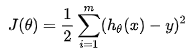
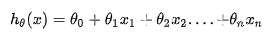
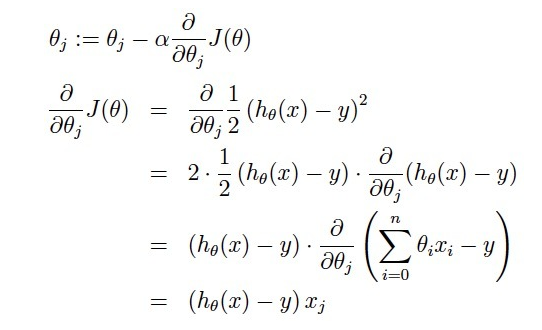
* 1)梯度下降：全部数据
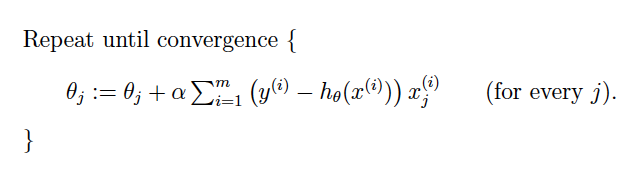
* 2)随机梯度下降：一个样本点
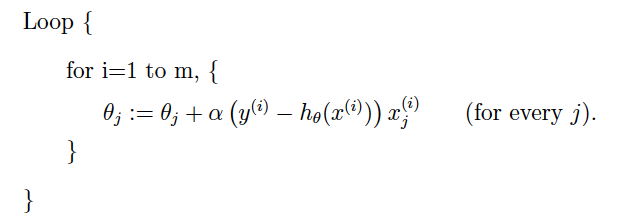

In [9]:
%matplotlib inline
import math
import torch
import dltools

epoch 50, x1: -0.060045, x2: 0.012340


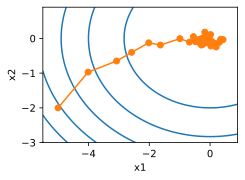

In [10]:
def f(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # 目标函数的梯度
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulatenoisygradient
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constantlearningrate
dltools.show_trace_2d(f, dltools.train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.813871, x2: -0.008622


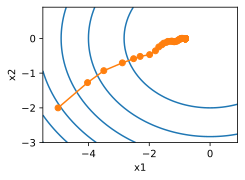

In [7]:
# 动态学习率
def exponential_lr():
    # Globalvariablethatisdefinedoutsidethisfunctionandupdatedinside
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
dltools.show_trace_2d(f, dltools.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.096075, x2: 0.038676


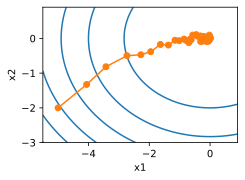

In [11]:
def polynomial_lr():
    # Globalvariablethatisdefinedoutsidethisfunctionandupdatedinside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
dltools.show_trace_2d(f, dltools.train_2d(sgd, steps=50, f_grad=f_grad))